**Implementing the same problem using the Decision Tree Regressor and comparison**


Linear Regression Performance:
R² Score: 0.8437600885956081
MAE: 1.358005769961511
RMSE: 1.7709620403197122

Decision Tree Regressor Performance:
R² Score: 0.21440546842328612
MAE: 3.1629694431618463
RMSE: 3.9711152032419474


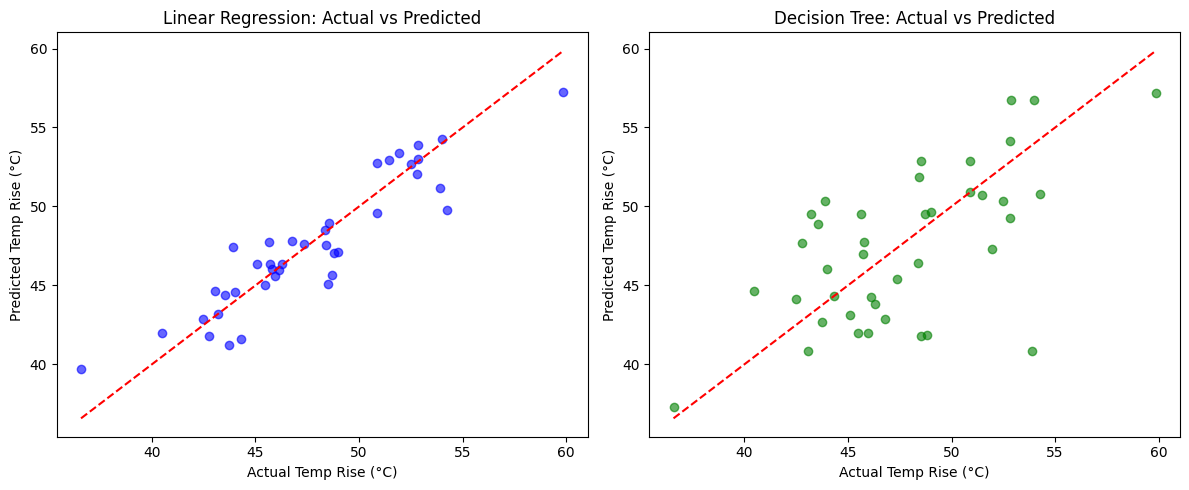


Predicted Temperature Rise for new data (Linear Regression): 49.92 °C
Predicted Temperature Rise for new data (Decision Tree): 53.20 °C


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ---------------------------
# Step 1: Synthetic Dataset
# ---------------------------
np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)           # in Volts
current = np.random.uniform(5, 15, n_samples)              # in Amps
ambient_temp = np.random.uniform(20, 35, n_samples)        # °C
load = np.random.uniform(50, 100, n_samples)               # %
running_time = np.random.uniform(10, 120, n_samples)       # minutes

# Temperature rise model (synthetic physics-inspired relation)
temp_rise = (
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)  # noise
)

df = pd.DataFrame({
    "Voltage": voltage,
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise
})

# ---------------------------
# Step 2: Train/Test Split
# ---------------------------
X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Step 3a: Train Linear Regression Model
# ---------------------------
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# ---------------------------
# Step 3b: Train Decision Tree Regressor
# ---------------------------
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# ---------------------------
# Step 4: Evaluation
# ---------------------------
def print_metrics(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

print_metrics(y_test, y_pred_lin, "Linear Regression")
print_metrics(y_test, y_pred_tree, "Decision Tree Regressor")

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise (°C)")
plt.ylabel("Predicted Temp Rise (°C)")
plt.title("Linear Regression: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise (°C)")
plt.ylabel("Predicted Temp Rise (°C)")
plt.title("Decision Tree: Actual vs Predicted")

plt.tight_layout()
plt.show()

# ---------------------------
# Step 6: Predict for New Data
# ---------------------------
new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})

predicted_temp_lin = lin_model.predict(new_data)[0]
predicted_temp_tree = tree_model.predict(new_data)[0]

print(f"\nPredicted Temperature Rise for new data (Linear Regression): {predicted_temp_lin:.2f} °C")
print(f"Predicted Temperature Rise for new data (Decision Tree): {predicted_temp_tree:.2f} °C")